In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import math
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('gdf-sample.csv')

In [30]:
df.head()

,Unnamed: 0,Area,Chart,Message,Authority,Date,StartDate,EndDate,BroadcastingDate,GeometryType,Coordinates,lon_centroid,lat_centroid
0,10142,NORTH SEA./SCOTLAND./DNC 20.,35010.,ST. ABBS HEAD LIGHT 55-55.0N 002-08.3W RANGE ...,WZ,2017-07-05 00:00:00,2018-06-29,2018-06-29,2018-06-29,Point,"[(-2.138334, 55.916667, 0.0)]",-2.138334,55.916667
1,21984,PHILIPPINE SEA./DNC 12.,NO CHART,DISTRESS SIGNAL RECEIVED ON 406 MHZ FROM VESS...,JAPAN COAST GUARD,2018-07-22 00:00:00,2018-07-24,2018-07-24,2018-07-24,Point,"[(136.736945, 28.263889, 0.0)]",136.736945,28.263889
2,29556,NORTH SEA./ENGLAND-SOUTHEAST COAST./DNC 20.,37140.,UNEXPLODED ORDNANCE IN 52-07.4N 001-50.4E.//,WZ,2018-07-04 00:00:00,2018-08-10,2018-08-10,2018-08-10,Point,"[(1.84, 52.123334, 0.0)]",1.840000,52.123334
3,34133,WESTERN SOUTH ATLANTIC. /BRAZIL-NORTHEAST COAS...,24220.,1. NORTH BANCO INGLES BREAKWATER LIGHT 08-0...,NAVAREA V COASTAL E,2018-07-31 00:00:00,2018-08-21,2019-01-28,2018-08-21,Point,"[(-34.85, -8.045, 0.0)]",-34.850000,-8.045000
4,36157,BAY OF CAMPECHE./MEXICO.,28310.,BOC9 ODAS BUOY ESTABLISHED IN 19-43-57N 096-23...,MEXICO IV,2018-08-17 00:00:00,2018-08-24,2018-08-24,2018-08-24,Point,"[(-96.3925, 19.7325, 0.0)]",-96.392500,19.732500


In [117]:
def generateRiskGrid(df, cellSize):
    # initiate df based on gridSize to run from -180 to 180, -90 to 90
    indices = np.arange(0, 180 + cellSize, cellSize, dtype=np.single)
    columns = np.arange(0, 360 + cellSize, cellSize, dtype=np.single)
    z = np.zeros(shape=( len(indices), len(columns)))
    precision = 0 # need to work out how many decimal places to include ...
        # also - what if cellSize is, say, 0.3 ... 
        # or do we?

    grid = pd.DataFrame(columns=columns, data=z).set_index(indices)

#     v = Tue
    for row in df.iterrows():
#         if v:
        x = float(row[1]['lon_centroid'] + 180)
        y = float(row[1]['lat_centroid'] + 90)
        xi = np.float64(x - x % cellSize)
        yi = np.float64(y - y % cellSize)
        print( (xi), yi )
        print((grid.index[0]))
        grid.loc[ y - y % cellSize, x - x % cellSize] += 1

#             v = False

    
    return grid
x = generateRiskGrid(df, 1)

(177.0, 145.0)
0.0
(316.0, 118.0)
0.0
(181.0, 142.0)
0.0
(145.0, 81.0)
0.0
(83.0, 109.0)
0.0
(321.0, 139.0)
0.0
(329.0, 121.0)
0.0
(66.0, 120.0)
0.0
(118.0, 102.0)
0.0
(144.0, 78.0)
0.0
(348.0, 67.0)
0.0
(192.0, 125.0)
0.0
(177.0, 140.0)
0.0
(204.0, 122.0)
0.0
(207.0, 126.0)
0.0
(320.0, 121.0)
0.0
(300.0, 115.0)
0.0
(286.0, 99.0)
0.0
(139.0, 69.0)
0.0
(213.0, 134.0)
0.0
(205.0, 125.0)
0.0
(61.0, 122.0)
0.0
(286.0, 109.0)
0.0
(204.0, 125.0)
0.0
(312.0, 130.0)
0.0
(100.0, 99.0)
0.0
(287.0, 96.0)
0.0
(194.0, 126.0)
0.0
(11.0, 155.0)
0.0
(283.0, 91.0)
0.0
(256.0, 99.0)
0.0
(83.0, 158.0)
0.0
(178.0, 150.0)
0.0
(84.0, 109.0)
0.0
(338.0, 143.0)
0.0
(181.0, 143.0)
0.0
(289.0, 103.0)
0.0
(101.0, 102.0)
0.0
(193.0, 124.0)
0.0
(194.0, 123.0)
0.0
(107.0, 48.0)
0.0
(271.0, 110.0)
0.0
(286.0, 110.0)
0.0
(115.0, 108.0)
0.0
(205.0, 125.0)
0.0
(115.0, 108.0)
0.0
(100.0, 109.0)
0.0
(101.0, 91.0)
0.0
(324.0, 141.0)
0.0
(11.0, 156.0)
0.0
(123.0, 96.0)
0.0
(194.0, 123.0)
0.0
(295.0, 58.0)
0.0
(121.0, 96.0)

(290.0, 107.0)
0.0
(119.0, 100.0)
0.0
(320.0, 121.0)
0.0
(231.0, 115.0)
0.0
(118.0, 102.0)
0.0
(194.0, 123.0)
0.0
(178.0, 150.0)
0.0
(63.0, 110.0)
0.0
(85.0, 164.0)
0.0
(212.0, 134.0)
0.0
(118.0, 100.0)
0.0
(194.0, 63.0)
0.0
(188.0, 127.0)
0.0
(118.0, 102.0)
0.0
(11.0, 156.0)
0.0
(121.0, 96.0)
0.0
(117.0, 100.0)
0.0
(215.0, 124.0)
0.0
(179.0, 143.0)
0.0
(103.0, 99.0)
0.0
(174.0, 125.0)
0.0
(116.0, 108.0)
0.0
(118.0, 102.0)
0.0
(89.0, 109.0)
0.0
(79.0, 96.0)
0.0
(124.0, 27.0)
0.0
(194.0, 123.0)
0.0
(290.0, 104.0)
0.0
(178.0, 150.0)
0.0
(204.0, 129.0)
0.0
(231.0, 117.0)
0.0
(103.0, 76.0)
0.0
(118.0, 100.0)
0.0
(287.0, 110.0)
0.0
(11.0, 156.0)
0.0
(215.0, 124.0)
0.0
(112.0, 100.0)
0.0
(122.0, 96.0)
0.0
(122.0, 97.0)
0.0
(324.0, 141.0)
0.0
(98.0, 109.0)
0.0
(118.0, 102.0)
0.0
(102.0, 96.0)
0.0
(299.0, 70.0)
0.0
(136.0, 134.0)
0.0
(122.0, 97.0)
0.0
(176.0, 143.0)
0.0
(265.0, 108.0)
0.0
(122.0, 97.0)
0.0
(181.0, 126.0)
0.0
(115.0, 108.0)
0.0
(288.0, 111.0)
0.0
(98.0, 109.0)
0.0
(179.0, 150.0

(300.0, 115.0)
0.0
(102.0, 96.0)
0.0
(285.0, 96.0)
0.0
(286.0, 109.0)
0.0
(119.0, 98.0)
0.0
(173.0, 132.0)
0.0
(115.0, 108.0)
0.0
(67.0, 114.0)
0.0
(83.0, 158.0)
0.0
(176.0, 141.0)
0.0
(132.0, 95.0)
0.0
(194.0, 126.0)
0.0
(215.0, 124.0)
0.0
(122.0, 97.0)
0.0
(188.0, 127.0)
0.0
(118.0, 102.0)
0.0
(203.0, 130.0)
0.0
(226.0, 163.0)
0.0
(102.0, 96.0)
0.0
(91.0, 106.0)
0.0
(70.0, 113.0)
0.0
(212.0, 134.0)
0.0
(136.0, 66.0)
0.0
(11.0, 158.0)
0.0
(133.0, 95.0)
0.0
(181.0, 142.0)
0.0
(84.0, 109.0)
0.0
(176.0, 141.0)
0.0
(123.0, 157.0)
0.0
(338.0, 142.0)
0.0
(44.0, 160.0)
0.0
(121.0, 157.0)
0.0
(69.0, 113.0)
0.0
(232.0, 115.0)
0.0
(182.0, 149.0)
0.0
(342.0, 159.0)
0.0
(195.0, 61.0)
0.0
(118.0, 102.0)
0.0
(118.0, 102.0)
0.0
(287.0, 107.0)
0.0
(125.0, 28.0)
0.0
(85.0, 164.0)
0.0
(145.0, 85.0)
0.0
(144.0, 78.0)
0.0
(135.0, 31.0)
0.0
(179.0, 150.0)
0.0
(173.0, 146.0)
0.0
(314.0, 133.0)
0.0
(289.0, 101.0)
0.0
(287.0, 110.0)
0.0
(68.0, 116.0)
0.0
(173.0, 139.0)
0.0
(179.0, 150.0)
0.0
(299.0, 112.0)
0

(122.0, 96.0)
0.0
(285.0, 108.0)
0.0
(270.0, 111.0)
0.0
(297.0, 85.0)
0.0
(115.0, 108.0)
0.0
(176.0, 148.0)
0.0
(263.0, 107.0)
0.0
(122.0, 97.0)
0.0
(294.0, 95.0)
0.0
(213.0, 134.0)
0.0
(124.0, 96.0)
0.0
(327.0, 46.0)
0.0
(46.0, 160.0)
0.0
(116.0, 108.0)
0.0
(116.0, 108.0)
0.0
(62.0, 120.0)
0.0
(201.0, 126.0)
0.0
(237.0, 69.0)
0.0
(141.0, 76.0)
0.0
(297.0, 70.0)
0.0
(118.0, 100.0)
0.0
(269.0, 111.0)
0.0
(108.0, 101.0)
0.0
(122.0, 97.0)
0.0
(315.0, 115.0)
0.0
(124.0, 27.0)
0.0
(354.0, 54.0)
0.0
(300.0, 115.0)
0.0
(188.0, 91.0)
0.0
(101.0, 91.0)
0.0
(195.0, 61.0)
0.0
(102.0, 96.0)
0.0
(320.0, 117.0)
0.0
(118.0, 102.0)
0.0
(181.0, 143.0)
0.0
(177.0, 139.0)
0.0
(125.0, 161.0)
0.0
(302.0, 120.0)
0.0
(46.0, 160.0)
0.0
(271.0, 110.0)
0.0
(251.0, 109.0)
0.0
(173.0, 139.0)
0.0
(231.0, 117.0)
0.0
(215.0, 125.0)
0.0
(335.0, 126.0)
0.0
(246.0, 114.0)
0.0
(180.0, 144.0)
0.0
(201.0, 127.0)
0.0
(116.0, 108.0)
0.0
(102.0, 96.0)
0.0
(101.0, 91.0)
0.0
(115.0, 108.0)
0.0
(342.0, 159.0)
0.0
(291.0, 109.0)

(30.0, 165.0)
0.0
(300.0, 115.0)
0.0
(139.0, 69.0)
0.0
(124.0, 96.0)
0.0
(204.0, 129.0)
0.0
(212.0, 134.0)
0.0
(252.0, 108.0)
0.0
(333.0, 68.0)
0.0
(101.0, 91.0)
0.0
(141.0, 85.0)
0.0
(173.0, 146.0)
0.0
(119.0, 101.0)
0.0
(114.0, 100.0)
0.0
(107.0, 108.0)
0.0
(179.0, 150.0)
0.0
(145.0, 172.0)
0.0
(256.0, 99.0)
0.0
(342.0, 159.0)
0.0
(120.0, 23.0)
0.0
(292.0, 60.0)
0.0
(118.0, 103.0)
0.0
(85.0, 108.0)
0.0
(108.0, 57.0)
0.0
(286.0, 107.0)
0.0
(118.0, 100.0)
0.0
(271.0, 110.0)
0.0
(70.0, 112.0)
0.0
(85.0, 159.0)
0.0
(46.0, 158.0)
0.0
(303.0, 116.0)
0.0
(101.0, 91.0)
0.0
(165.0, 144.0)
0.0
(287.0, 99.0)
0.0
(287.0, 100.0)
0.0
(171.0, 123.0)
0.0
(285.0, 109.0)
0.0
(92.0, 107.0)
0.0
(91.0, 107.0)
0.0
(92.0, 107.0)
0.0
(125.0, 27.0)
0.0
(321.0, 143.0)
0.0
(342.0, 159.0)
0.0
(212.0, 134.0)
0.0
(326.0, 71.0)
0.0
(259.0, 100.0)
0.0
(342.0, 159.0)
0.0
(183.0, 153.0)
0.0
(273.0, 98.0)
0.0
(46.0, 160.0)
0.0
(158.0, 153.0)
0.0
(120.0, 103.0)
0.0
(188.0, 127.0)
0.0
(100.0, 109.0)
0.0
(288.0, 111.0)
0

(205.0, 130.0)
0.0
(101.0, 91.0)
0.0
(118.0, 102.0)
0.0
(216.0, 135.0)
0.0
(203.0, 125.0)
0.0
(122.0, 96.0)
0.0
(251.0, 109.0)
0.0
(116.0, 108.0)
0.0
(100.0, 109.0)
0.0
(27.0, 147.0)
0.0
(324.0, 141.0)
0.0
(102.0, 96.0)
0.0
(162.0, 104.0)
0.0
(103.0, 97.0)
0.0
(299.0, 112.0)
0.0
(342.0, 159.0)
0.0
(230.0, 158.0)
0.0
(300.0, 111.0)
0.0
(170.0, 122.0)
0.0
(115.0, 108.0)
0.0
(134.0, 88.0)
0.0
(273.0, 98.0)
0.0
(281.0, 102.0)
0.0
(82.0, 105.0)
0.0
(36.0, 41.0)
0.0
(299.0, 99.0)
0.0
(24.0, 162.0)
0.0
(118.0, 100.0)
0.0
(119.0, 100.0)
0.0
(173.0, 139.0)
0.0
(252.0, 111.0)
0.0
(181.0, 142.0)
0.0
(124.0, 96.0)
0.0
(106.0, 46.0)
0.0
(85.0, 159.0)
0.0
(141.0, 74.0)
0.0
(124.0, 96.0)
0.0
(287.0, 100.0)
0.0
(178.0, 150.0)
0.0
(118.0, 100.0)
0.0
(232.0, 115.0)
0.0
(342.0, 159.0)
0.0
(140.0, 68.0)
0.0
(195.0, 61.0)
0.0
(139.0, 69.0)
0.0
(35.0, 76.0)
0.0
(217.0, 159.0)
0.0
(131.0, 132.0)
0.0
(119.0, 100.0)
0.0
(141.0, 74.0)
0.0
(287.0, 108.0)
0.0
(120.0, 103.0)
0.0
(98.0, 109.0)
0.0
(90.0, 119.0)
0.0

In [129]:
x.describe()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0
count,181.000000,181.000000,181.0,181.000000,181.0,181.0,181.0,181.0,181.0,181.0,...,181.0,181.0,181.0,181.000000,181.0,181.000000,181.000000,181.000000,181.0,181.0
mean,0.011050,0.005525,0.0,0.005525,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.027624,0.0,0.027624,0.005525,0.038674,0.0,0.0
std,0.148659,0.074329,0.0,0.074329,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.267310,0.0,0.245650,0.074329,0.339356,0.0,0.0
min,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
max,2.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,3.000000,1.000000,4.000000,0.0,0.0


In [133]:
x.where(x > 0)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


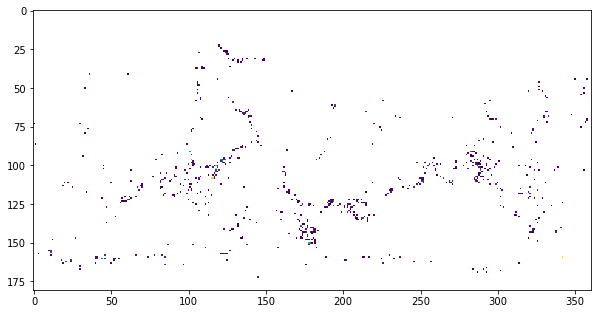

In [136]:
# plt.style.context('lightbackground')

fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(x.where(x > 0))
plt.show()